In [117]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
folder_path = ('D:\dm\data')
# Mengecek ada file apa saja di `folder_path`
os.listdir(folder_path)

['2015.csv',
 '2016.csv',
 '2017.csv',
 '2018.csv',
 '2019.csv',
 '2020.csv',
 '2021.csv',
 '2022.csv']

In [119]:
# Mendefinisikan path ke folder tempat file CSV disimpan
path_file_2022 = os.path.join(folder_path, '2022.csv')

# Membaca file CSV dan menyimpan isi ke dalam DataFrame sesuai dengan value `path_file_2022`
df_2022 = pd.read_csv(path_file_2022)

In [120]:
# drop Country tanpa Happiness Score
df_2022 = df_2022.dropna()

# mendapatkan kolom `object`
obj_col = df_2022.select_dtypes(include=['O']).columns

# Mendapatkan semua kolom kecuali 'RANK' dan 'Country'
columns = [col for col in obj_col if col not in ['RANK', 'Country']]

# Convert kolom numeric yang awalnya `object` menjadi `float`
for col in columns:
    df_2022.loc[:, col] = df_2022[col].str.replace(',', '.').astype(float)

In [121]:
# Memfilter DataFrame df_2022 untuk hanya memasukkan data dari negara-negara AFC 2024
afc_countries = ["Qatar", "Indonesia", "Australia", "Jordan", "South Korea",
                 "Japan", "China", "United Arab Emirates", "Iraq", "Saudi Arabia",
                 "Tajikistan", "Thailand", "Uzbekistan", "Vietnam", "Kuwait*", "Malaysia"]

afc_df = df_2022.loc[df_2022['Country'].isin(afc_countries)]

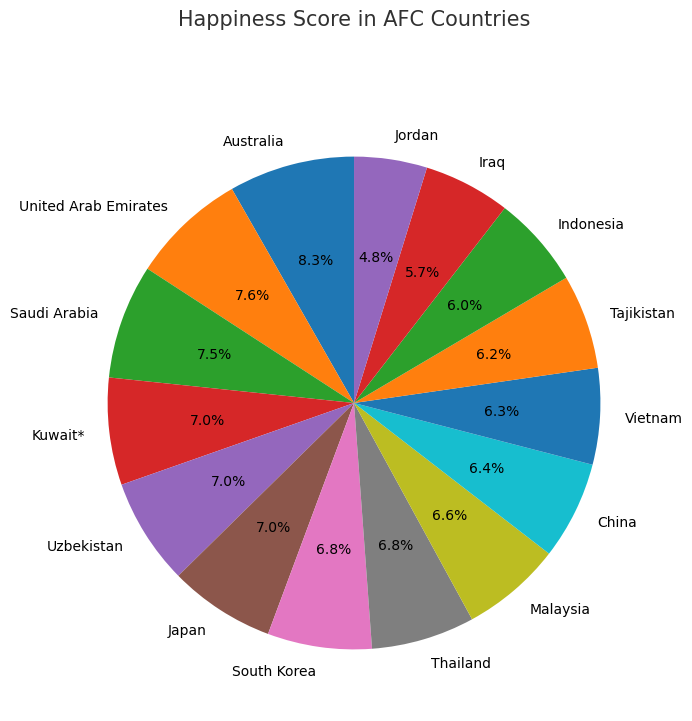

In [122]:
# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Create pie chart with the Happiness score values
ax.pie(afc_df['Happiness score'], labels=afc_df['Country'], autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Happiness Score in AFC Countries', size=15, color=colors_dark[1], y=1.1)

# Show the plot
plt.show()

In [123]:
set(afc_countries) - set(afc_df.Country)

{'Qatar'}

In [124]:
afc_df.loc[afc_df['Country']=='United Arab Emirates', 'Country'] = 'UAE'
afc_df.loc[afc_df['Country']=='Kuwait*', 'Country'] = 'Kuwait'

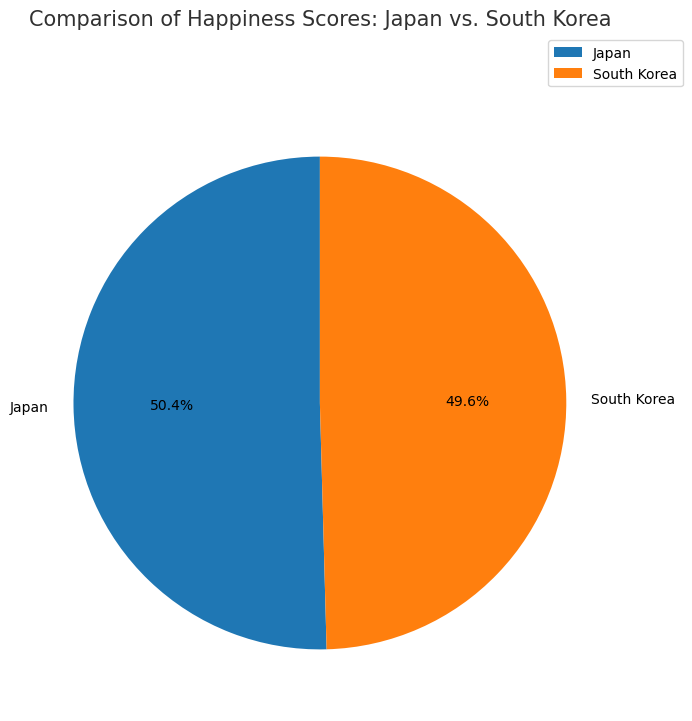

In [125]:


# Filter rows for South Korea and Indonesia
countries = ['Japan', 'South Korea']
df_plot = afc_df[afc_df['Country'].isin(countries)]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Get the happiness scores for each country
scores = df_plot['Happiness score'].tolist()

# Create a pie chart with the happiness scores
ax.pie(scores, labels=df_plot['Country'], autopct='%1.1f%%', startangle=90)

# Set the title and legend
plt.title('Comparison of Happiness Scores: Japan vs. South Korea', size=15, color=colors_dark[1], y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()

In [126]:
afc_df

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
11,12,Australia,7.162,7.244,7.081,2.011,1.9,1.203,0.772,0.676,0.258,0.341
23,24,UAE,6.576,6.66,6.492,1.809,1.998,0.98,0.633,0.702,0.204,0.25
24,25,Saudi Arabia,6.523,6.637,6.409,2.075,1.87,1.092,0.577,0.651,0.078,0.18
49,50,Kuwait,6.106,6.235,5.977,1.621,1.904,0.983,0.747,0.617,0.087,0.147
52,53,Uzbekistan,6.063,6.178,5.948,1.913,1.219,1.092,0.6,0.716,0.283,0.24
53,54,Japan,6.039,6.119,5.959,1.487,1.835,1.089,0.866,0.537,0.007,0.218
58,59,South Korea,5.935,6.021,5.849,1.656,1.851,0.886,0.841,0.414,0.111,0.176
60,61,Thailand,5.891,5.994,5.788,1.6,1.535,1.096,0.697,0.617,0.321,0.026
69,70,Malaysia,5.711,5.845,5.578,1.471,1.689,0.938,0.62,0.654,0.213,0.126
71,72,China,5.585,5.65,5.52,1.516,1.508,0.958,0.705,0.656,0.099,0.142


In [127]:
afc_df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [128]:
# Filter rows for South Korea and Indonesia
countries = ['South Korea', 'Japan']
df_plot = afc_df[afc_df['Country'].isin(countries)]
for i , r in df_plot.iterrows():
  print(r)

RANK                                             54
Country                                       Japan
Happiness score                               6.039
Whisker-high                                  6.119
Whisker-low                                   5.959
Dystopia (1.83) + residual                    1.487
Explained by: GDP per capita                  1.835
Explained by: Social support                  1.089
Explained by: Healthy life expectancy         0.866
Explained by: Freedom to make life choices    0.537
Explained by: Generosity                      0.007
Explained by: Perceptions of corruption       0.218
Name: 53, dtype: object
RANK                                                   59
Country                                       South Korea
Happiness score                                     5.935
Whisker-high                                        6.021
Whisker-low                                         5.849
Dystopia (1.83) + residual                          1.656
Expl

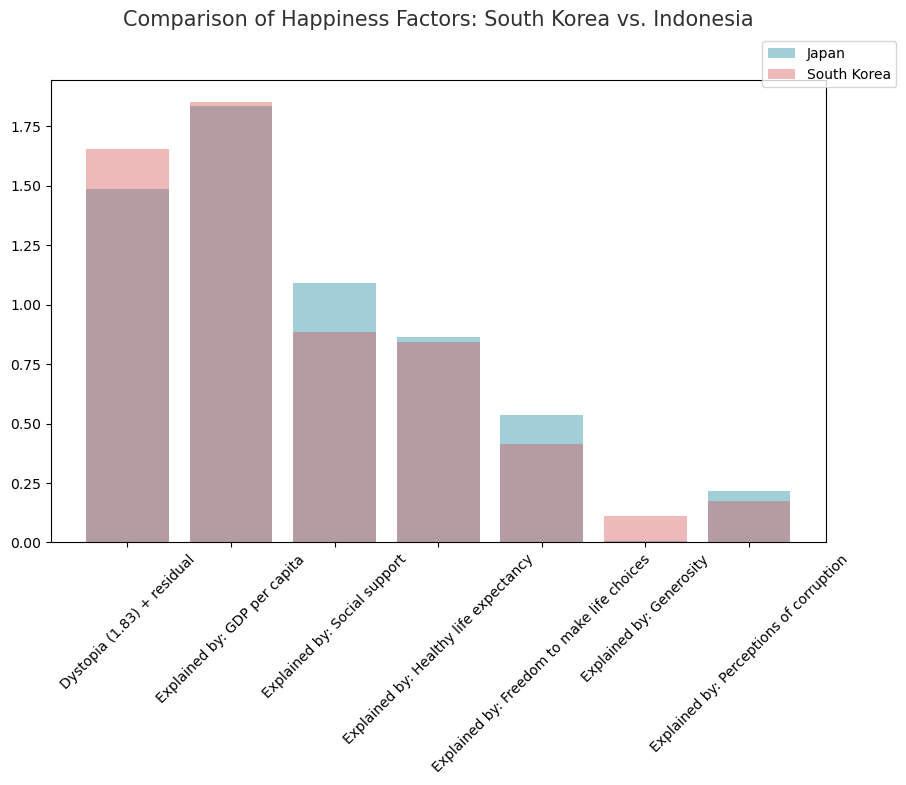

In [129]:
# Filter rows for South Korea and Indonesia
countries = ['South Korea', 'Japan']
df_plot = afc_df[afc_df['Country'].isin(countries)]

# Columns to include in the histogram
columns = ['Dystopia (1.83) + residual', 'Explained by: GDP per capita',
           'Explained by: Social support', 'Explained by: Healthy life expectancy',
           'Explained by: Freedom to make life choices',
           'Explained by: Generosity', 'Explained by: Perceptions of corruption']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each country
for k, (idx, row) in enumerate(df_plot.iterrows()):
    # Create a histogram for each country
    ax.bar(range(len(columns)), row[columns].tolist(), label=row['Country'], alpha=0.4, color=colors_mix[3*k])

# Set the x-axis tick labels
ax.set_xticks(range(len(columns)))
ax.set_xticklabels(columns, rotation=45)

# Set the title and legend
plt.title('Comparison of Happiness Factors: South Korea vs. Indonesia', size=15, color=colors_dark[1], y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()

In [130]:
row

RANK                                                   59
Country                                       South Korea
Happiness score                                     5.935
Whisker-high                                        6.021
Whisker-low                                         5.849
Dystopia (1.83) + residual                          1.656
Explained by: GDP per capita                        1.851
Explained by: Social support                        0.886
Explained by: Healthy life expectancy               0.841
Explained by: Freedom to make life choices          0.414
Explained by: Generosity                            0.111
Explained by: Perceptions of corruption             0.176
Name: 58, dtype: object